In [1]:
!pip install dask


In [2]:
import dask.dataframe as dd


In [3]:
import pandas as pd
import numpy as np

# Define the number of records
num_records = 1000

# Create sample data
np.random.seed(0)
data = {
    'ID': np.arange(1, num_records + 1),
    'Name': [f'Name_{i}' for i in range(1, num_records + 1)],
    'Age': np.random.randint(20, 60, size=num_records),
    'Department': np.random.choice(['Engineering', 'Marketing', 'Sales', 'HR'], size=num_records),
    'Salary': np.random.randint(50000, 120000, size=num_records),
    'Joining Date': pd.to_datetime(np.random.choice(pd.date_range('2010-01-01', '2023-01-01', freq='D'), size=num_records))
}

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_filename = '/content/employee_data.csv'
df.to_csv(csv_filename, index=False)

# Display the first few rows of the dataset to verify
df.head()


,ID,Name,Age,Department,Salary,Joining Date
0,1,Name_1,20,Engineering,67610,2013-02-09
1,2,Name_2,23,Engineering,72613,2012-12-14
2,3,Name_3,23,Marketing,78327,2016-09-17
3,4,Name_4,59,Marketing,119888,2021-10-05
4,5,Name_5,29,Marketing,102410,2020-10-16


In [4]:
from google.colab import files

# Trigger the download of the CSV file
files.download('/content/employee_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
import pandas as pd

# Load the CSV file back into a DataFrame
df = pd.read_csv('/content/employee_data.csv')

# Display the first few rows
df.head()


,ID,Name,Age,Department,Salary,Joining Date
0,1,Name_1,20,Engineering,67610,2013-02-09
1,2,Name_2,23,Engineering,72613,2012-12-14
2,3,Name_3,23,Marketing,78327,2016-09-17
3,4,Name_4,59,Marketing,119888,2021-10-05
4,5,Name_5,29,Marketing,102410,2020-10-16


ID              0
Name            0
Age             0
Department      0
Salary          0
Joining Date    0
dtype: int64
                ID          Age         Salary
count  1000.000000  1000.000000    1000.000000
mean    500.500000    39.322000   84794.815000
std     288.819436    11.608923   20236.204871
min       1.000000    20.000000   50043.000000
25%     250.750000    29.000000   68027.250000
50%     500.500000    39.000000   84113.000000
75%     750.250000    49.000000  102381.750000
max    1000.000000    59.000000  119919.000000
Department
HR             261
Engineering    255
Marketing      252
Sales          232
Name: count, dtype: int64


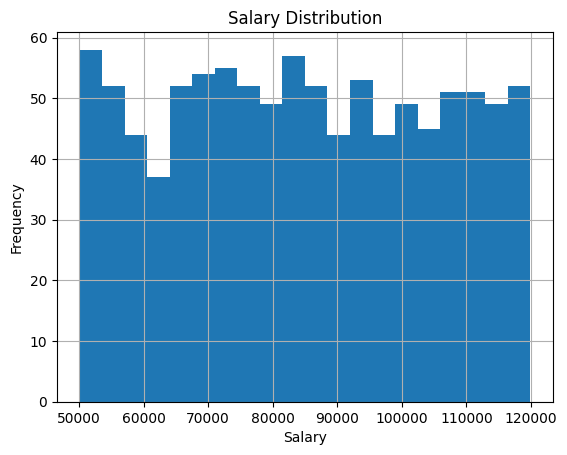

In [6]:
# Check for missing values
print(df.isnull().sum())

# Summary statistics of numerical columns
print(df.describe())

# Count the number of employees in each department
print(df['Department'].value_counts())

# Histogram of the salary column
import matplotlib.pyplot as plt
df['Salary'].hist(bins=20)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


In [7]:
# After making modifications, save the updated DataFrame
df.to_csv('/content/updated_employee_data.csv', index=False)


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 ID              0
Name            0
Age             0
Department      0
Salary          0
Joining Date    0
dtype: int64


In [11]:
# Summary statistics for numerical columns
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
                 ID          Age         Salary
count  1000.000000  1000.000000    1000.000000
mean    500.500000    39.322000   84794.815000
std     288.819436    11.608923   20236.204871
min       1.000000    20.000000   50043.000000
25%     250.750000    29.000000   68027.250000
50%     500.500000    39.000000   84113.000000
75%     750.250000    49.000000  102381.750000
max    1000.000000    59.000000  119919.000000


In [12]:
# Grouping by department and getting average salary
avg_salary_by_department = df.groupby('Department')['Salary'].mean()
print("Average Salary by Department:\n", avg_salary_by_department)


Average Salary by Department:
 Department
Engineering    86884.650980
HR             83810.498084
Marketing      83890.833333
Sales          84587.064655
Name: Salary, dtype: float64


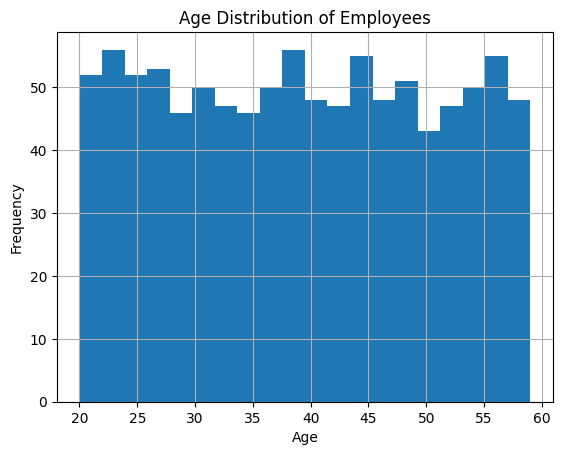

In [13]:
import matplotlib.pyplot as plt
df['Age'].hist(bins=20)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


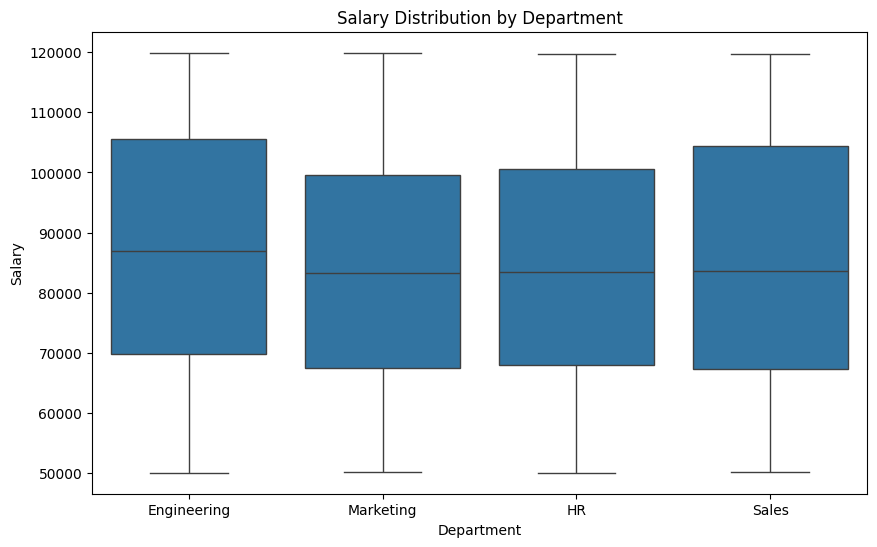

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Department', y='Salary')
plt.title('Salary Distribution by Department')
plt.show()


In [15]:
df = df.drop_duplicates()


In [16]:
# Fill missing values with the median for the 'Age' column
df['Age'] = df['Age'].fillna(df['Age'].median())


In [17]:
# Save the cleaned dataset to a new CSV file
df.to_csv('/content/cleaned_employee_data.csv', index=False)


In [18]:
# Show the first few rows of the dataset
print("First few records:\n", df.head())

# Get the shape of the dataset (number of rows and columns)
print("\nShape of the dataset (rows, columns):", df.shape)


First few records:
    ID    Name  Age   Department  Salary Joining Date
0   1  Name_1   20  Engineering   67610   2013-02-09
1   2  Name_2   23  Engineering   72613   2012-12-14
2   3  Name_3   23    Marketing   78327   2016-09-17
3   4  Name_4   59    Marketing  119888   2021-10-05
4   5  Name_5   29    Marketing  102410   2020-10-16

Shape of the dataset (rows, columns): (1000, 6)


In [19]:
# Summary statistics for numerical columns
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)


Summary Statistics:
                 ID          Age         Salary
count  1000.000000  1000.000000    1000.000000
mean    500.500000    39.322000   84794.815000
std     288.819436    11.608923   20236.204871
min       1.000000    20.000000   50043.000000
25%     250.750000    29.000000   68027.250000
50%     500.500000    39.000000   84113.000000
75%     750.250000    49.000000  102381.750000
max    1000.000000    59.000000  119919.000000


In [20]:
# Group by department and get average salary
avg_salary_by_department = df.groupby('Department')['Salary'].mean()
print("Average Salary by Department:\n", avg_salary_by_department)


Average Salary by Department:
 Department
Engineering    86884.650980
HR             83810.498084
Marketing      83890.833333
Sales          84587.064655
Name: Salary, dtype: float64


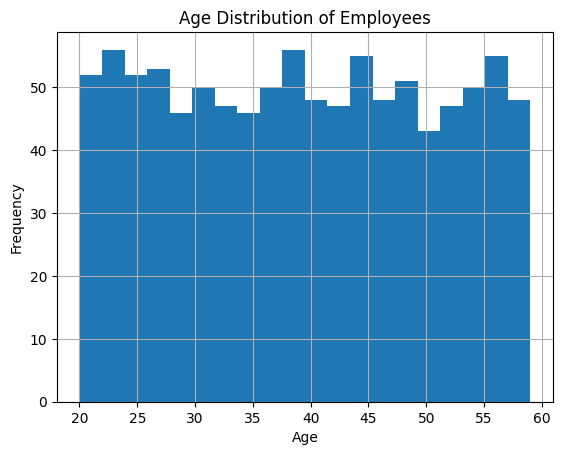

In [21]:
# Plot a histogram to visualize age distribution
import matplotlib.pyplot as plt

df['Age'].hist(bins=20)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


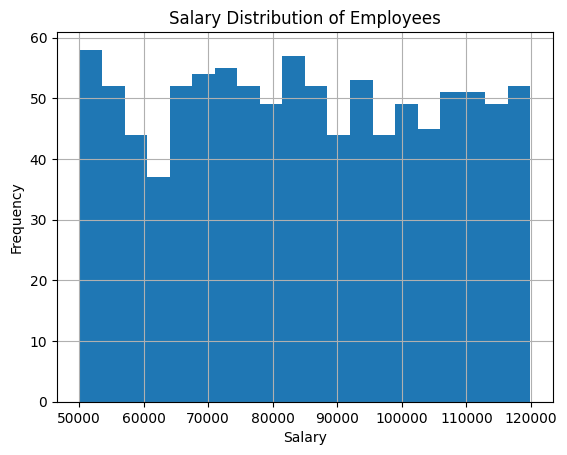

In [22]:
# Plot salary distribution
df['Salary'].hist(bins=20)
plt.title('Salary Distribution of Employees')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


In [23]:
# Count of employees in each department
department_count = df['Department'].value_counts()
print("Number of Employees in Each Department:\n", department_count)


Number of Employees in Each Department:
 Department
HR             261
Engineering    255
Marketing      252
Sales          232
Name: count, dtype: int64


In [24]:
# Calculate correlation between Age and Salary
correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between Age and Salary: {correlation}")


Correlation between Age and Salary: 0.01248644733763539


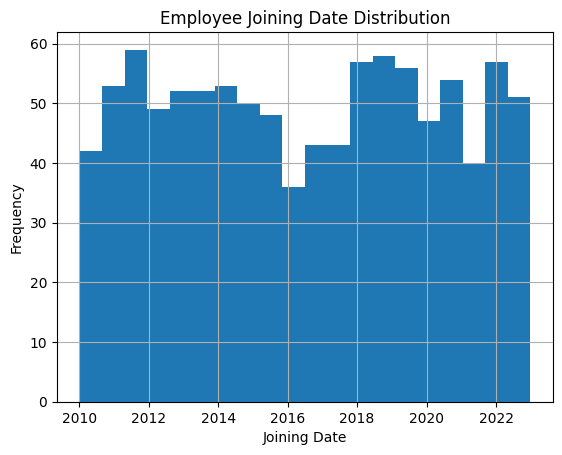

In [25]:
# Convert joining date to datetime if it's not already
df['Joining Date'] = pd.to_datetime(df['Joining Date'])

# Plot a histogram of the joining dates
df['Joining Date'].hist(bins=20)
plt.title('Employee Joining Date Distribution')
plt.xlabel('Joining Date')
plt.ylabel('Frequency')
plt.show()
